# DSI206 Project


<div style="pxborder-radius:10px; border:#80cbc4
 solid; padding: 15px; background-color: #e0f2f1; font-size:100%; text-align:left">

<h3 align="left"><font color='#4db6ac'> 💻 Member</font></h3>

1. พลพล จันทรอาภา        6524650063
1. สิริชูพงษ์ จำปาศักดิ์       6524650097
1. ชนากานต์ วีรเดชทวีวรรณ   6524651194
1. ภัทรนิษฐ์ เจริญเนาวพัฒน์   6524651327
1. ฤทธิ์ธิดา ยิ่งนัยเกียรติ     6524651350
1. อินทิตา พิทย์พงศ์กุล      6524651475
 </div>  
    
### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000000; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300"> Yelp Restaurant Photo Classification </p>
    
  


# <div style= "color:#FBF8BE;display:inline-block;border-radius:12px;background-color:#FBF8BE;font-block:Nexa;overflow:hidden;border:3px solid #000000"><p style="padding:15px;color:#234E70;overflow:hidden;font-size:70%;letter-spacing:0.5px;margin:0"><b> </b>Table of Contents📰</p></div>
    
* [Import for Data Exploration, Data Preparation and Model](#import)
* [Data Loading](#load)
* [Data Exploration & Preparation DataFrame](#exandprep)
* [Data Preparation](#dataprep)
* [About model](#model)
* [Model Prediction](#modelpre)
* [Submission File RestNet34 ](#submit)
* [Reference](#ref)


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000000; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #003300" id="import"> Import for Data Exploration, Data Preparation and Model </p>

In [1]:
import numpy as np                                                    #ใช้ทำงานร่วมกับข้อมูลประเภทตัวเลข
import pandas as pd                                                   #ใช้ทำงานร่วมกับข้อมูลที่มีโครงสร้าง
from IPython.display import display                                   #เพื่อแสดงรูปภาพ
import matplotlib.pyplot as plt                                       #ใช้สำหรับการพล็อตและแสดงกราฟ
import matplotlib.image as mpimg
import plotly                                                         #ใช้สร้างกราฟและแสดงผลข้อมูล
import plotly.graph_objs as go                                        #สร้าง interactive กราฟ
from PIL import Image                                                 #เพื่อทำการประมวลผลรูปภาพ และทำงานกับภาพต่าง ๆ ใน Python ได้อย่างสะดวก
from PIL import ImageFilter                                           #ใช้ปรับปรุง หรือเปลี่ยนแปลงลักษณะต่าง ๆ ของรูปภาพ
import cv2                                                            #เพื่อเรียกใช้คำสั่งการค้นหาที่ต้องการ
import random                                                         #สุ่มค่าต่างๆที่เรากำหนดไว้
from collections import Counter                                       #นับจำนวนของอะไรบางอย่างว่ามีอะไรอยู่เท่าไหร่
import time                                                           #ใช้วัดเวลาการประมวลผลหรือทำงานที่เกี่ยวข้องกับเวลา
import os                                                             #ใช้ทำงานกับระบบไฟล์
import torch                                                          #เพื่อเข้าถึง tensor operations และ modules ที่มีใน PyTorch
from torch.utils.data import Dataset, random_split, DataLoader        #Dataset ใช้สร้าง dataset, random_split ใช้แบ่ง dataset เป็นส่วน ๆ โดยสุ่ม, DataLoader ใช้โหลดข้อมูลจาก dataset เพื่อใช้ในการ train model
import torchvision.models as models                                   #เป็น library ที่มีโมเดล neural network ที่ถูกทำการ pre-trained ให้ใช้งานได้กับการทำนายภาพ
import torchvision.transforms as transforms                           #เป็นโมดูลที่มีคำสั่งต่าง ๆ สำหรับแปลงไฟล์รูปภาพ
from sklearn.metrics import f1_score                                  #ใช้คำนวณ F1 Score สำหรับการจำแนกประเภทของโมเดลที่คุณฝึกอบรมแล้ว โดยเปรียบเทียบการทำนายกับข้อมูลจริง 
import torch.nn.functional as F                                       #ใช้ในการคำนวณ Loss
from torchvision.utils import make_grid                               #ใช้เพื่อสร้างกริดของรูปภาพ                                     

from fastai import *                                                  #library Fatsai เอาเข้ามาทำ Computer Vision
from fastai.vision import *                                           #ใช้สำหรับการประมวลผลข้อมูลที่เกี่ยวข้องกับ image processing                      
from fastai.metrics import accuracy                                   #คำนวณค่า accuracy ของโมเดล
from fastai.vision.all import *                                       #เข้าถึงทุกฟังก์ชันและคลาสของ fastai vision
from fastai.metrics import error_rate                                 #ใช้คำนวณ error rate ของโมเดล
from IPython.display import Image                                     #ใช้แสดงรูปภาพ
from pathlib import Path                                              #เพื่อจัดการ path ของ file และ directory
from tqdm.notebook import tqdm                                        #เพื่อแสดงความคืบหน้า(จำนวนครั้งที่ต้องทำงาน, เวลาที่ประมาณว่างานจะเสร็จ, ความเร็วในการทำงาน)ที่ terminal กำลังทำ

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000000; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300" id="load"> Data Loading </p>
<div class="alert alert-success">  
<b>📍</b> ขั้นตอนการเตรียมความพร้อมในการใช้งานของไฟล์และตั้งตัวแปรต่าง ๆ  
</div>


<div style="pxborder-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:85%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 นำเข้าข้อมูลจำนวน 6 ไฟล์ ดังนี้ และเตรียมความพร้อมของไฟล์พร้อมทั้งตั้งตัวแปรเพื่อใช้สำหรับการวิเคราะห์ข้อมูลต่อไป</font></h3>

1. train_photos.tgz - รูปภาพของชุดฝึก 
1. test_photos.tgz- รูปภาพของชุดทดสอบ
1. train_photo_to_biz_ids.csv - จาก photo_id ไป business_id
1. test_photo_to_biz_ids.csv - จาก photo_id ไป business_id
1. train.csv - ชุดข้อมูลฝึกหลัก รวมถึง business_id และ corresponding labels
1. sample_submission.csv - ตัวอย่าง submission และ test dataset นี่คือรูปแบบที่ถูกต้องสำหรับการทำนาย
ควรประกอบด้วย business_id และ corresponding predicted labels

In [2]:
# บันทึกเวลาเริ่มการ run code
start_time = time.time()

# แตกไฟล์ที่ถูกบีบอัดด้วย gzip และมีนามสกุล .tar.gz. โดยใช้ !tar -xzf จากนั้นสร้างไดเรกทอรีใหม่ที่มีชื่อเดียวกับไฟล์ .tar.gz และจะนำเนื้อหาทั้งหมดของไฟล์ไปวางไว้ในไดเรกทอรีนั้น
!tar -xzf /kaggle/input/yelp-restaurant-photo-classification/sample_submission.csv.tgz
!tar -xzf /kaggle/input/yelp-restaurant-photo-classification/test_photo_to_biz.csv.tgz
!tar -xzf /kaggle/input/yelp-restaurant-photo-classification/test_photos.tgz
!tar -xzf /kaggle/input/yelp-restaurant-photo-classification/train.csv.tgz
!tar -xzf /kaggle/input/yelp-restaurant-photo-classification/train_photo_to_biz_ids.csv.tgz
!tar -xzf /kaggle/input/yelp-restaurant-photo-classification/train_photos.tgz

# บันทึกเวลาสิ้นสุดการ run code
end_time = time.time()

# แสดงระยะเวลาที่ใช้ในหน่วยวินาทีและนาที
print("Run time: {:.2f} seconds".format(end_time - start_time))
print("Run time: {:.2f} minutes".format((end_time - start_time)/60))

Run time: 264.83 seconds
Run time: 4.41 minutes


In [3]:
# อ่านข้อมูลจากไฟล์ train_photo_to_biz_ids.csv, test_photo_to_biz.csv, train.csv, sample_submission.csv 
# จากนั้นเก็บไว้ในตัวแปร train_photos, test_photos, train_attr, sub ตามลำดับ
train_photos = pd.read_csv("/kaggle/working/train_photo_to_biz_ids.csv")
test_photos = pd.read_csv("/kaggle/working/test_photo_to_biz.csv")
train_attr = pd.read_csv("/kaggle/working/train.csv") 
sub = pd.read_csv("/kaggle/working/sample_submission.csv")

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000000; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300" id="exandprep"> Data Exploration & Preparation DataFrame </p>

<div class="alert alert-success">  
<b>📍</b> Data Exploration Section 
</div>

In [4]:
display(train_attr.head(8))                                                 # แสดงแถวแรก 8 แถวของ DataFrame 'train_attr'
print('Shape of train data:', train_attr.shape)                             # แสดง DataFrame ทั้งหมด
print('Number of unique businesses:', train_attr.shape[0])                  # แสดงจำนวน Business ที่ไม่ซ้ำกัน

,business_id,labels
0,1000,1 2 3 4 5 6 7
1,1001,0 1 6 8
2,100,1 2 4 5 6 7
3,1006,1 2 4 5 6
4,1010,0 6 8
5,101,1 2 3 4 5 6
6,1011,2 3 5 6
7,1012,1 2 3 5 6


Shape of train data: (2000, 2)
Number of unique businesses: 2000


In [5]:
display(train_photos.head(8))                                              # แสดงแถวแรก 8 แถวของ DataFrame train_attr
print('Shape of train_photo_to_id:', train_photos.shape)                   # แสดง DataFrame ทั้งหมด
print('Number of images in training set:', train_photos.shape[0])          # แสดงจำนวน train รูปภาพใน model

,photo_id,business_id
0,204149,3034
1,52779,2805
2,278973,485
3,195284,485
4,19992,485
5,80748,485
6,444996,1783
7,200285,35


Shape of train_photo_to_id: (234842, 2)
Number of images in training set: 234842


In [6]:
display(test_photos.head(8))                                               # แสดงแถวแรก 8 แถวของ DataFrame train_attr
print('Shape of test_photo_to_id:', test_photos.shape)                     # แสดง DataFrame ทั้งหมด
print('Number of images in test set:', test_photos.shape[0])               # แสดงจำนวน test

,photo_id,business_id
0,317818,003sg
1,30679,003sg
2,455084,003sg
3,371381,003sg
4,86224,003sg
5,36076,003sg
6,46999,003sg
7,74896,003sg


Shape of test_photo_to_id: (1190225, 2)
Number of images in test set: 1190225


<div class="alert alert-block alert-info">  
<b>📎</b> นับความถี่ของแต่ละ label และแสดงผล
</div>

In [7]:
all_labels = ' '.join(list(train_attr['labels'].fillna('nan').values)).split()                # ทำการรวมและแยก labels
from collections import Counter
label_counts = Counter(all_labels)                                                            # นับความถี่ของแต่ละ label
for key in label_counts:                                                                      # วนลูปแล้วรับค่าจากทุก key ใน label_counts
    print('Label {0} appears {1} times in training dataset'.format(key, label_counts[key]))   # แสดงผลลัพธ์จำนวน label ที่ปรากฎ 

Label 1 appears 993 times in training dataset
Label 2 appears 1026 times in training dataset
Label 3 appears 1003 times in training dataset
Label 4 appears 547 times in training dataset
Label 5 appears 1249 times in training dataset
Label 6 appears 1360 times in training dataset
Label 7 appears 572 times in training dataset
Label 0 appears 671 times in training dataset
Label 8 appears 1238 times in training dataset
Label nan appears 4 times in training dataset


In [8]:
print('Number of duplicate photo IDs:', len(train_photos[train_photos['photo_id'].duplicated()]))    # แสดงค่าซ้ำ'photo_id' ของ DataFrame train_photos
print('Number of duplicate business IDS:', len(train_attr[train_attr['business_id'].duplicated()]))  # แสดงค่าซ้ำ 'business_id' ของ DataFrame train_attr

Number of duplicate photo IDs: 0
Number of duplicate business IDS: 0


In [9]:
# Business id to labels dataframe
print('Total number of missing labels:', train_attr['labels'].isnull().sum())   # แสดงจำนวน labels ที่หายไป
display(train_attr[train_attr['labels'].isnull()])                              # แสดงแถวใน DataFrame ที่ labels หายไป

Total number of missing labels: 4


,business_id,labels
385,1627,NaN
928,2661,NaN
1083,2941,NaN
1678,430,NaN


<div class="alert alert-success">  
<b>📍</b> Preparation DataFrame Section 
</div>

In [10]:
train_attr = train_attr.dropna(axis=0)                                          # Drop Missing Value (4 rows)
display(train_attr)
print('Shape of train data:', train_attr.shape)                                 # แสดงจำนวนแถวและจำนวนคอลัมน์ของ train_att
print('Number of unique businesses:', train_attr.shape[0])                      # ใช้ .shape เพื่อแสดงจำนวนธุรกิจที่ไม่ซ้ำกัน

,business_id,labels
0,1000,1 2 3 4 5 6 7
1,1001,0 1 6 8
2,100,1 2 4 5 6 7
3,1006,1 2 4 5 6
4,1010,0 6 8
...,...,...
1995,991,1 2 3 5 6 7
1996,993,3 6 8
1997,997,8
1998,998,1 2 4 5 6 7


Shape of train data: (1996, 2)
Number of unique businesses: 1996


In [11]:
train_label = pd.merge(train_photos,train_attr,how = "inner")                  # Merge ข้อมูลของ 'train_photos' และ 'train_attr' แบบ inner join แล้วเก็บข้อมูลในชื่อ 'train_label'
train_label = train_label.sample(n=30000)                                      # สุ่มเลือกข้อมูลจาก train_label มา 30,000 แถว
display(train_label)
print('Shape of train label:', train_label.shape)                              # แสดงจำนวนแถวและจำนวนคอลัมน์ของ train_label
train_label.isnull().sum()                                                     # นับจำนวนค่าที่หายไป(NaN) ในแต่ละคอลัมน์

,photo_id,business_id,labels
207693,9235,3767,0 3 8
148078,248183,3285,0 6 8
42040,4075,487,1 2 3 4 5 6
202101,398607,3748,1 2 3 4 5 6 7
148304,230661,3191,1 2 4 5 6
...,...,...,...
58313,57346,2795,1 2 3 4 5 6 7
78457,418066,3157,0 3 8
9673,102647,1773,1 2 3 4 5 6 7
222631,262139,2308,1 2 4 5 6


Shape of train label: (30000, 3)


photo_id       0
business_id    0
labels         0
dtype: int64

In [12]:
test_csv = pd.merge(test_photos, sub, how = "inner")                         # Merge ข้อมูลของ 'test_photos' และ 'sub' แบบ outer join แล้วเก็บข้อมูลในชื่อ test_csv
test_csv = test_csv.groupby(['business_id'], as_index=False).first()         # Group ข้อมูลโดยใช้คอลัมน์ 'business_id' เป็นคีย์ โดยที่ไม่เป็น index และเลือกแถวแรกในแต่ละกลุ่ม
display(test_csv)
print('Shape of test csv:', test_csv.shape)                                  # แสดงจำนวนแถวและจำนวนคอลัมน์ของ test_csv

,business_id,photo_id,labels
0,003sg,317818,1 2 3
1,00er5,220529,1 2 3
2,00kad,96324,1 2 3
3,00mc6,219849,1 2 3
4,00q7x,207951,1 2 3
...,...,...,...
9995,zyvg6,159238,1 2 3
9996,zyvjj,362367,1 2 3
9997,zz8g4,69380,1 2 3
9998,zzxkg,325313,1 2 3


Shape of test csv: (10000, 3)


<div class="alert alert-success">  
<b>📍</b> Preparation DataFrame to CSV 
</div>

In [13]:
test_csv.to_csv('test_csv.csv', index=False)                                  # บันทึก DataFrame 'test_csv' เป็นไฟล์ CSV โดยใช้ชื่อไฟล์ 'test_csv.csv' และกำหนด index=False เพื่อไม่เก็บคอลัมน์ index ลงในไฟล์ CSV
train_label.to_csv('train_label.csv', index=False)                            # บันทึก DataFrame 'train_label' เป็นไฟล์ CSV โดยใช้ชื่อไฟล์ 'train_label.csv' และกำหนด index=False เพื่อไม่เก็บคอลัมน์ index ลงในไฟล์ CSV

In [14]:
DATA_DIR = '/kaggle/working/'                                                 # กำหนดค่าตัวแปรสำหรับที่อยู่ของไดเรกทอรี
TRAIN_DIR = DATA_DIR + 'train_photos'                                         # กำหนดค่าตัวแปรสำหรับที่อยู่ของไดเรกทอรี่ /kaggle/working/ ให้แสดงเป็น 'DATA_DIR' 
TEST_DIR = DATA_DIR + 'test_photos'                                           # กำหนดค่าตัวแปรของการรวม DATA_DIR และ test_photos ให้แสดงเป็น 'TEST_DIR'
TRAIN_CSV = DATA_DIR + 'train_label.csv'                                      # กำหนดค่าตัวแปรของการรวม DATA_DIR และ train_label.csv ให้แสดงเป็น 'TRAIN_CSV'
TEST_CSV = DATA_DIR + 'test_csv.csv'                                          # กำหนดค่าตัวแปรของการรวม DATA_DIR และ test_csv.csv ให้แสดงเป็น 'TEST_CSV'
TEST_TO_BUS = DATA_DIR + 'test_photo_to_biz.csv'                              # กำหนดค่าตัวแปรของการรวม DATA_DIR และ test_photo_to_biz.csv ให้แสดงเป็น 'TEST_TO_BUS'

In [15]:
train_df = pd.read_csv(TRAIN_CSV)         # อ่านข้อมูลจาก TRAIN_CSV และจัดเก็บใน 'train_df'
train_df                                  # แสดงข้อมูลของ 'train_df'

,photo_id,business_id,labels
0,9235,3767,0 3 8
1,248183,3285,0 6 8
2,4075,487,1 2 3 4 5 6
3,398607,3748,1 2 3 4 5 6 7
4,230661,3191,1 2 4 5 6
...,...,...,...
29995,57346,2795,1 2 3 4 5 6 7
29996,418066,3157,0 3 8
29997,102647,1773,1 2 3 4 5 6 7
29998,262139,2308,1 2 4 5 6


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000000; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300" id="dataprep"> Data Preparation </p>

<div style="pxborder-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:80%; text-align:left">

<h3 align="left"><font color='#DEB887'>🎞 การนำภาพที่เป็นส่วนนึงของธุระกิจต่างๆ มาทำนายว่าภาพนั้นหมายถึงธุรกิจอะไร โดยใ้ช้ 9 คุณลักษณะในการตัดสิน </font></h3>

0.ดีสำหรับมื้อกลางวัน
    
1.ดีสำหรับมื้อค้ำ
    
2.Label รับการจองที่นั่ง
    
3.ที่นั่งกลางแจ้ง
    
4.ร้านอาหารมีราคาแพง
    
5.มีแอลกอฮอล์
    
6.มีบริการโต๊ะ
    
7.บรรยากาศที่หรูหรา
    
8.ดีสำหรับเด็ก

คำอธิบายของไฟล์
* train_photos.tgz - รูปภาพของชุดฝึก
* test_photos.tgz- รูปภาพของชุดทดสอบ
* train_photo_to_biz_ids.csv - จาก photo_id ไป business_id
* test_photo_to_biz_ids.csv - จาก photo_id ไป business_id
* train.csv - ชุดข้อมูลฝึกหลัก รวมถึง business_id และ corresponding labels
* sample_submission.csv - ตัวอย่าง submission และ test dataset นี่คือรูปแบบที่ถูกต้องสำหรับการทำนาย ควรประกอบด้วย business_id และ corresponding predicted labels

<div style="pxborder-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:85%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 List of Labels</font></h3>

0: good_for_lunch

1: good_for_dinner

2: takes_reservations

3: outdoor_seating

4: restaurant_is_expensive

5: has_alcohol

6: has_table_service

7: ambience_is_classy

8: good_for_kids

In [16]:
#กำหนด Key:Value ของ Lable แต่ละประเภท
labels = {0: 'good_for_lunch', 
          1: 'good_for_dinner', 
          2: 'takes_reservations',  
          3: 'outdoor_seating',
          4: 'restaurant_is_expensive', 
          5: 'has_alcohol', 
          6: 'has_table_service', 
          7: 'ambience_is_classy',
          8: 'good_for_kids'}

In [17]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import *
path_images = '/kaggle/working/train_photos'                          # กำหนด path เก็บรูปภาพที่จะใช้
filenames = get_image_files(path_images)                              # กำหนดตัวแปรเพื่อใช้ function ดึงไฟล์รูปภาพทั้งหมดจาก File Paths
filenames[:10]                                                        # การแสดงผล10 รูปแรกจากในไฟล์

(#10) [Path('/kaggle/working/train_photos/64893.jpg'),Path('/kaggle/working/train_photos/239194.jpg'),Path('/kaggle/working/train_photos/428110.jpg'),Path('/kaggle/working/train_photos/38246.jpg'),Path('/kaggle/working/train_photos/386785.jpg'),Path('/kaggle/working/train_photos/312533.jpg'),Path('/kaggle/working/train_photos/425458.jpg'),Path('/kaggle/working/train_photos/317478.jpg'),Path('/kaggle/working/train_photos/249500.jpg'),Path('/kaggle/working/train_photos/308793.jpg')]

<div class="alert alert-block alert-info">  
<b>📎</b> ฟังก์ชันสำหรับการแปลง label และ Tensor 
</div>

In [18]:
# ฟังก์ชันสำหรับการแปลง label ในรูปแบบของข้อความไปเป็น tensor และฟังก์ชันสำหรับการแปลง tensor กลับเป็น label 
def encode_label(label):
    target = torch.zeros(10)                                           # ฟังก์ชันรับข้อความ label และสร้าง tensor ขนาด 10 
    for l in str(label).split(' '):                                    # วนลูปผ่านทุกตัวอักษรที่ได้จากการแปลง label เป็น string และใช้ช่องว่าง (' ') เป็นตัวแยก (delimiter) ระหว่างคำที่ต่อเนื่องกัน
        target[int(l)] = 1.                                             # เปลี่ยนตัวอักษรที่ได้ในแต่ละรอบให้เป็นตัวเลขและนำตัวเลขนั้นไปใช้ในการกำหนดค่า index ของ target
    return target

# ฟังก์ชันแปลง Tensor ที่ได้จากการทำนายของโมเดลเป็น label หรือลำดับของ labels ได้อย่างยืดหยุ่นขึ้น, โดยใช้ threshold เป็นเงื่อนไข
def decode_target(target, text_labels=False, threshold=0.5):
    result = []
    for i, x in enumerate(target):                                    # กำหนดloopโดยมีเงื่อนไขว่าถ้า x มากกว่าหรือเท่ากับ threshold, จะเพิ่ม label ลงในlist ของ result
        if (x >= threshold):
            if text_labels:
                result.append(labels[i] + "(" + str(i) + ")")         # เพิ่ม label ที่อยู่ในตำแหน่ง i ของ labels พร้อมกับลำดับ i ลงใน list result
            else:                                                     # ถ้า text_labels เป็น False ให้ทำต่อ
                result.append(str(i))
    return ' '.join(result)                                           # รวม list result เป็น string โดยใช้ช่องว่าง (' ') เป็นตัวคั่นระหว่างรายการ

display(encode_label('0 3 8'))
display(decode_target(torch.tensor([1., 0., 0., 1., 0., 0., 0., 0., 1., 0.]), text_labels=True))

tensor([1., 0., 0., 1., 0., 0., 0., 0., 1., 0.])

'good_for_lunch(0) outdoor_seating(3) good_for_kids(8)'

<div class="alert alert-block alert-info">  
<b>📎</b> สร้าง class เพื่อใช้โหลดข้อมูลรูปภาพจาก dataset ที่มีข้อมูลที่อยู่ในรูปแบบของไฟล์ CSV และรูปภาพที่ตั้งอยู่ในไดเรกทอรีที่กำหนด 
</div>

In [19]:
class YelpResPhoto(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.df = pd.read_csv(csv_file)                                    # อ่านไฟล์ CSV 
        self.transform = transform                                         # ปรับปรุงภาพเพื่อให้เหมาะกับการฝึกโมเดล
        self.root_dir = root_dir                                           # ไดเรกทอรีหลักที่เก็บรูปภาพของ dataset 
        
    def __len__(self):                                                     # ระบุจำนวนรูปภาพ และ บอกขนาดของ dataset               
        return len(self.df)                                                # คืนค่าจำนวนแถวของ DataFrame ที่เก็บข้อมูลจำนวนรูปภาพใน dataset  
    
    def __getitem__(self, idx):                                            # ฟังก์ชั่นโหลดข้อมูลสำหรับแต่ละตัวอย่างใน dataset
        row = self.df.loc[idx]                                             # ดึงข้อมูลของตัวอย่างใน idx ใน DataFrame
        img_id, img_label = row['photo_id'], row['labels']                 # ดึงข้อมูล photo_id และ labels จาก DataFrame    
        img_fname = self.root_dir + "/" + str(img_id) + ".jpg"             # สร้าง path โดยรวม root_dir, img_id, และกำหนดนามสกุลไฟล์เป็น .jpg
        img = Image.open(img_fname)                                        # โหลดรูปภาพจากไฟล์ img_fname
        
        
        if self.transform:
            img = self.transform(img)                                      # ระบุการแปลงเมื่อสร้างอินสแตนซ์ของรูปภาพทุกภาพใน dataset 
        return img,encode_label(img_label)                                 # คืนค่า tuple ที่ประกอบไปด้วยรูปภาพที่ผ่านการแปลงและ label ที่ถูกแปลงจากข้อความเป็น tensor 

In [20]:
transform = transforms.Compose([transforms.ToTensor()])                      # เปลี่ยนแปลงภาพทั้งหมดและเก็บในรูปแบบของ list แล้วใช้ transforms.Compose เพื่อรวมทั้งหมดและนำไปใช้กับชุดข้อมูล
dataset = YelpResPhoto(TRAIN_CSV, TRAIN_DIR, transform=transform)            # สร้าง DataLoader เพื่อให้ง่ายต่อการโหลดข้อมูลในแต่ละรอบของการฝึกโมเดล


<div class="alert alert-block alert-info">  
<b>📎</b> ฟังก์ชันแสดงตัวอย่างของภาพพร้อมกับlabels ที่ถูกถอดรหัสจาก tensor 
</div>

Labels: good_for_lunch(0) outdoor_seating(3) good_for_kids(8)


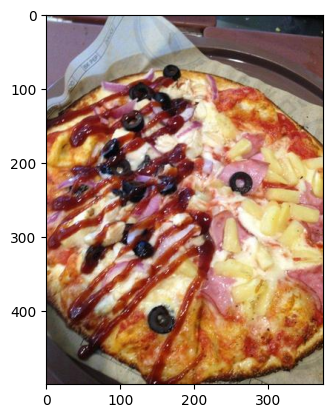

In [21]:
 def show_sample(img, target, invert=False):                       
    plt.imshow(img.permute(1, 2, 0))                                     # ใช้ Matplotlib เพื่อแสดงภาพบนกราฟ
    print('Labels:', decode_target(target, text_labels=True))

show_sample(*dataset[0])                                                 # แสดงตัวอย่างของรูปภาพแรก และ lables 

<div class="alert alert-success">  
<b>📍</b> Train and Validation Data Preparation 
</div>

In [22]:
val_pct = 0.1                             # แบ่งชุดข้อมูลเป็นชุด train กับ validation แบบสุ่มจาก dataset แล้วเก็บค่าใน train_ds (90%) และ val_ds (10%) จากนั้นแสดงจำนวนออกมา
val_size = int(val_pct * len(dataset))      
train_size = len(dataset) - val_size      

In [23]:
train_ds, val_ds = random_split(dataset, [train_size, val_size])    # แบ่งชุดข้อมูลเป็นชุด test และชุด train แบบสุ่มโดยรับเข้ามาทั้ง dataset 
len(train_ds), len(val_ds)                                          # คำนวณขนาดของ train_ds และ val_ds เพื่อเช็กว่าแบ่งข้อมูลตามที่แบบที่ต้องการ

(27000, 3000)

In [24]:
train_dl = DataLoader(train_ds, item_tfms=Resize(460),                                                          # ปรับขนาดรูปภาพทั้งหมดของ train_ds ให้มีขนาดเดียวกัน เพื่อให้ง่ายต่อการนำเข้าข้อมูลเข้าสู่โมเดล
                      batch_tfms=aug_transforms(size=224), shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_ds, item_tfms=Resize(460),                                                              # ปรับขนาดรูปภาพทั้งหมดของ val_ds ให้มีขนาดเดียวกัน เพื่อให้ง่ายต่อการนำเข้าข้อมูลเข้าสู่โมเดล
                    batch_tfms=aug_transforms(size=224), num_workers=2, pin_memory=True)

<div class="alert alert-block alert-info">  
<b>📎 </b> ฟังก์ชัน show_batch สำหรับแสดงตัวอย่างรูปภาพ และ lables ที่รับค่ามาจาก DataLoader(d1)
</div>

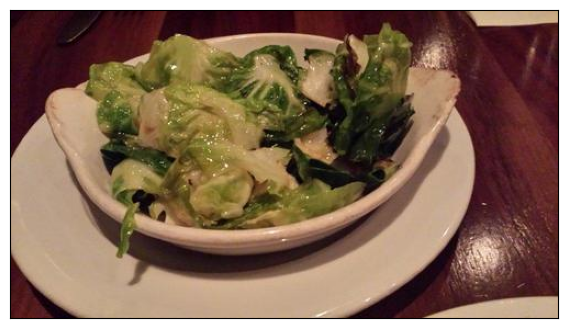

In [25]:
def show_batch(dl): 
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(9, 4))                  # กำหนดขนาดของ figure ให้มีความกว้าง 9 นิ้วและความสูง 4 นิ้ว 
        ax.set_xticks([]); ax.set_yticks([])                    # set แกน x และแกน y ให้ไม่แสดงเลข
        data = images                                           # เอารูปไปเก็บในตัวแปรชื่อ data
        ax.imshow(make_grid(data, nrow=16).permute(1, 2, 0))    # ทำการรวมรูปภาพใน data ให้อยู่ในรูปแบบกริดโดยในแต่ละแถวจะแสดงรุปภาพ 16 รูป, ใช้ permute(1, 2, 0) เพื่อสลับแกนภาพเพื่อให้เข้ากับรูปแบบที่ Matplotlib ใช้แสดงรูป
        break                                                   # เพื่อหยุด loop หลังแสดงรูปภาพ 1 batch

show_batch(train_dl)                                            # แสดง image และ lables ที่ถูกโหลดจาก train_d1 แบบสุ่ม


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000000; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300" id="model"> About Model </p>



<div style="pxborder-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:85%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 ResNet-34</font></h3>
ResNet-34 เป็นโมเดลเรียนรู้เชิงลึก (deep learning model) ที่ถูกพัฒนาขึ้นโดย Microsoft Research สำหรับการจำแนกภาพ (image classification)."ResNet" มาจากคำว่า "Residual Network," ซึ่งแสดงถึงวิธีการที่ใช้ในการกำหนดโครงสร้างของโมเดล. โดย ResNet-34 นี้มีโครงสร้างทั้งหมด 34 layers, ประกอบด้วย convolutional layers, batch normalization, ReLU activation, residual blocks, max pooling, global average pooling, และ fully connected layers.

ขั้นตอนการทำงานของแต่ละชั้นของ ResNet-34 :

Input Layer:
รับภาพเป็นข้อมูลนำเข้า.
Convolutional Layer 1 (7x7 Convolution):
การสกัดคุณลักษณะด้วยการใช้ส่วนตัวสกัดคุณลักษณะขนาด 7x7.
Batch Normalization 1:
    
ปรับปรุงค่าคุณลักษณะด้วย batch normalization.
ReLU Activation 1:
    
ใช้ Rectified Linear Unit (ReLU) เป็นฟังก์ชัน activation หลังการสกัดคุณลักษณะ.
    
Max Pooling 1:
    
การลดขนาดของรูปภาพด้วย max pooling ขนาด 3x3.
    
Residual Block 1 (3 Layers):
    
ชุดของ 3 ชั้นที่ประกอบด้วย:
    
Convolutional Layer 2 (3x3 Convolution):
    
การสกัดคุณลักษณะด้วยส่วนตัวสกัดคุณลักษณะขนาด 3x3.
    
Batch Normalization 2:
    
ปรับปรุงค่าคุณลักษณะด้วย batch normalization.
    
ReLU Activation 2:
    
ใช้ ReLU เป็นฟังก์ชัน activation.
    
Convolutional Layer 3 (3x3 Convolution):
    
การสกัดคุณลักษณะด้วยส่วนตัวสกัดคุณลักษณะขนาด 3x3.
    
Batch Normalization 3:
    
ปรับปรุงค่าคุณลักษณะด้วย batch normalization.
    
Skip Connection (Identity Mapping):
    
    
Shortcut connection ที่ส่งข้อมูลตรงผ่านโดยไม่มีการทำซ้ำทางกลับ (skip connection).
ReLU Activation 3:
    
ใช้ ReLU เป็นฟังก์ชัน activation ท้ายสุดของ residual block.
    
Residual Block 2 (3 Layers):
    
ตามหลักการเดียวกันกับ Residual Block 1.
    
Residual Block 3 (3 Layers):
    
ตามหลักการเดียวกันกับ Residual Block 1.
    
Residual Block 4 (3 Layers):
    
ตามหลักการเดียวกันกับ Residual Block 1.
    
Global Average Pooling:
    
ทำให้ข้อมูลเข้าสู่รูปแบบที่สามารถให้ข้อมูลขนาดแนวนอนเป็น 1 (global average pooling).
    
Fully Connected Layer (Output Layer):
    
นำข้อมูลจาก global average pooling มาใช้ในการทำนายหมวดหมู่ของภาพ.
    
Softmax Activation:
    
ใช้ softmax activation เพื่อแปลงคะแนนของแต่ละหมวดหมู่ให้กลายเป็นความน่าจะเป็น.
    
ResNet-34 นี้ออกแบบมาเพื่อลดปัญหาการหายไปหรือหายมิได้ที่พบในโมเดลที่มีความลึกมาก โดยใช้ residual blocks และ shortcut connections เพื่อช่วยในการส่งผ่านข้อมูลโดยตรงโดยไม่มีการทำซ้ำทางกลับ (skip connection).
   
 ชั้น batch normalization ช่วยในการปรับปรุงความเร็วในการฝึกฝนและช่วยลดการกระทบจาก gradient exploding หรือ vanishing. 
    
 ชั้น global average pooling ช่วยในการลดขนาดของข้อมูลก่อนที่จะนำเข้า fully connected layer สุดท้ายสำหรับการทำนาย.

## RestNet34 Model

<div class="alert alert-success">  
<b>📍</b> train model
</div>
<div class="alert alert-block alert-info">  
<b>📎 </b> สร้าง class 'MultilabelImageClassificationBase' ที่เป็น subclass ของ 'nn.Module' (มี method ที่ใช้ในการทำนายและประเมินผลของโมเดลสำหรับงาน Multilabel Image Classification)
</div>

In [26]:
# สร้าง class 'MultilabelImageClassificationBase' ที่เป็น subclass ของ 'nn.Module' (มี method ที่ใช้ในการทำนายและประเมินผลของโมเดลสำหรับงาน Multilabel Image Classification)
class MultilabelImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, targets = batch                                                                       # รับ batch ข้อมูล(images, targets) จาก DataLoader 
        
        images = images.unsqueeze(0)                                                                  # เพิ่มมิติในแกนที่ 0 ของ images และ targets เพื่อให้มี batch dimension
        targets = targets.unsqueeze(0)
        
        out = self(images)                                                                            # ทำนายผลลัพธ์จากโมเดล self โดยนำ images ผ่านฟังก์ชัน forward ของโมเดล                                 
        loss = F.binary_cross_entropy(out, targets)                                                   # คำนวณ binary cross entropy loss ระหว่างผลลัพธ์ที่ได้จากผลลัพธ์ที่ได้(out) และ targets       
        return loss                                                                                   # คืนค่า loss ที่ได้จากการคำนวณอbinary cross entropy loss นั้น ๆ เพื่อให้สามารถใช้ในการปรับปรุงและอัปเดตพารามิเตอร์ของโมเดลในการ training ต่อไป
    
    def validation_step(self, batch):
        images, targets = batch                                                                       # แยกข้อมูลจาก batch เป็น images และ targets โดยใช้ tuple unpacking 
        images = images.unsqueeze(0)                                                                  # เพิ่มมิติในแกนที่ 0 ของ images และ targets เพื่อให้มี batch dimension
        targets = targets.unsqueeze(0)
        out = self(images)                                                                            # ทำนายผลลัพธ์จากโมเดล
        loss = F.binary_cross_entropy(out, targets)                                                   # คำนวณค่า loss เพื่อใช้ปรับปรุงพารามิเตอร์ของ model
        score = F_score(out, targets)                                                                 # คำนวณ F-score ระหว่างผลลัพธ์ที่ได้(out) กับ targets
        return {'val_loss': loss.detach(), 'val_score': score.detach() }                              # คืนค่า val_loss และ val_score เอาไปใช้ประเมินความสำเร็จของโมเดล
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]                                               # สร้าง list ของค่า 'val_loss' จากทุกรอบใน 'outputs'
        epoch_loss = torch.stack(batch_losses).mean()                                                 # รวมค่า 'val_loss' ทั้งหมดใน batch_losses โดยใช้ torch.stack เพื่อแปลง list เป็น tensor แล้วคำนวณค่าเฉลี่ย
        batch_scores = [x['val_score'] for x in outputs]                                              # สร้าง list ของค่า 'val_score' จากทุกรอบใน 'outputs'
        epoch_score = torch.stack(batch_scores).mean()                                                # รวมค่า 'val_score' ทั้งหมดใน batch_scores โดยใช้ torch.stack เพื่อแปลง list เป็น tensor แล้วคำนวณค่าเฉลี่ย
        return {'val_loss': epoch_loss.item(), 'val_score': epoch_score.item()}                       # คืนค่า dictionary ที่มีค่า 'val_loss' เป็นค่าเฉลี่ยของ 'val_loss' ในทั้ง epoch และ 'val_score' เป็นค่าเฉลี่ยของ 'val_score' ในทั้ง epoch. '.item()' ใช้เพื่อดึงค่า scalar จาก tensor
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_score: {:.4f}".format(           # พิมพ์ผลลัพธ์สรุปของการฝึกโมเดลในแต่ละ epoch
            epoch, result['train_loss'], result['val_loss'], result['val_score']))

<div class="alert alert-block alert-info">  
<b>📎</b> โมเดลที่ถูกสร้างขึ้นโดยเป็นคลาสหลักสำหรับการสร้างโมเดลสำหรับงานการจำแนกภาพที่มีหลาย label
</div>

In [27]:
class YelpRes34CnnModel(MultilabelImageClassificationBase):
    def __init__(self):
        super().__init__()                                                  # เรียกใช้เมธอด __init__ ของคลาสแม่ (super class) เพื่อให้ได้ความประโยชน์จากความสามารถและการกำหนดค่าที่ถูกนำมาจากคลาสหลัก
        # Use a pretrained model
        self.network = models.resnet34(pretrained=True)                     # ใช้โมเดล ResNet-34 ที่ถูกทำการฝึกสอนไว้ล่วงหน้าจาก PyTorch torchvision models, การใช้โมเดลที่ถูกฝึกสอนไว้ล่วงหน้านี้ช่วยให้โมเดลมีความสามารถในการจำแนกภาพได้ดีมากขึ้น 
        # Replace last layer
        num_ftrs = self.network.fc.in_features                              # หาจำนวน features ที่อยู่ในเลเยอร์สุดท้ายของโมเดลโดยใช้ in_features ซึ่งเป็นค่าที่ใช้ในการกำหนดจำนวน input features ในเลเยอร์แรกของโมเดลที่จะถูกเพิ่มใหม่
        self.network.fc = nn.Linear(num_ftrs, 10)                           # ทำการแทนที่เลเยอร์ที่เป็น fully connected สุดท้ายของโมเดลด้วย Linear layer ที่มี output features เป็น 10, นี่คือส่วนที่ทำให้โมเดลมีความสามารถในการจำแนกภาพอย่างแม่นยำตามจำนวน classes ที่กำหนด
    
    def forward(self, xb):                                                  # ทำการรับ batch ของ input data (xb) และทำการส่งผ่านโมเดล
        return torch.sigmoid(self.network(xb))                              # ผลลัพธ์ที่ได้จากโมเดลจะถูกผ่านฟังก์ชัน sigmoid เพื่อให้ได้ค่าที่อยู่ในช่วง 0-1 ซึ่งเป็นที่พบบ่อยในงานการจำแนกหลาย label

<div class="alert alert-success">  
<b>📍</b> คำนวณค่า F-score ในการประเมินประสิทธิภาพของโมเดล
</div>

In [28]:
def F_score(output, label, threshold=0.5, beta=1):
    prob = output > threshold                                                         # บอกว่าค่าความเป็นไปได้ที่โมเดลทำนายมีค่ามากกว่า threshold หรือไม่
    label = label > threshold                                                         # บอกว่าค่าป้ายกำกับมีค่ามากกว่า threshold หรือไม่

    TP = (prob & label).sum(1).float()                                                # นับจำนวน True Positive(TP)
    TN = ((~prob) & (~label)).sum(1).float()                                          # นับจำนวน True Negative(TN)
    FP = (prob & (~label)).sum(1).float()                                             # นับจำนวน False Positive(FP) 
    FN = ((~prob) & label).sum(1).float()                                             # นับจำนวน False Negative(FN)

    precision = torch.mean(TP / (TP + FP + 1e-12))                                    # คำนวณค่า precision เพื่อบอกความแม่นยำของโมเดล
    recall = torch.mean(TP / (TP + FN + 1e-12))                                       # คำนวณค่า recall เพื่อบอกค่าความถูกต้องของโมเดล
    F2 = (1 + beta**2) * precision * recall / (beta**2 * precision + recall + 1e-12)  # คำนวณค่า F-score
    return F2.mean(0)  

<div class="alert alert-success">  
<b>📍</b> คำนวณค่า F-score ในการประเมินประสิทธิภาพของโมเดล
</div>

In [29]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():                                           # ถ้ามี GPU ที่สามารถใช้งานได้ (CUDA available), ฟังก์ชันจะคืนอุปกรณ์ที่เป็น GPU 
        return torch.device('cuda')
    else:                                                                   # ถ้าไม่มี GPU ที่สามารถใช้งานได้, ฟังก์ชันจะคืนอุปกรณ์ที่เป็น CPU
        return torch.device('cpu')

# ฟังก์ชันย้าย Tensor หรือรายการของ Tensor ไปยังอุปกรณ์ที่กำหนด
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):                                      # ทุกรายการในlistหรือ tuple จะถูกย้ายไปยังอุปกรณ์ที่กำหนด
        return [to_device(x, device) for x in data]                         # data เป็น Tensor เดียว, ฟังก์ชันจะใช้เมธอด to ของ Tensor เพื่อย้าย Tensor นั้นไปยังอุปกรณ์ที่กำหนด
    return data.to(device, non_blocking=True)

# สร้างขึ้นเพื่อwrap คลาส DataLoader และทำการย้ายข้อมูลในแต่ละ batch ไปยังอุปกรณ์ที่กำหนด
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):                                         # กำหนดค่า initial state ของคลาส เพื่อรับ DataLoader (dl) และอุปกรณ์ที่ต้องการย้ายข้อมูลไป
        self.dl = dl                                                        # เก็บ DataLoader (dl) ที่รับเข้ามาเพื่อให้สามารถเข้าถึง DataLoader ได้ในทุกๆที่ในคลาส
        self.device = device                                                # เก็บอุปกรณ์ (device) ที่รับเข้ามา เพื่อให้สามารถใช้งานในทุกๆ ที่ในคลาส DeviceDataLoader
        
    def __iter__(self):                                                     # generator method ที่ใช้ในการวนลูปผ่าน DataLoader (dl) และ yield แต่ละ batch หลังจากที่ย้ายข้อมูลใน batch นั้นไปยังอุปกรณ์ที่กำหนด
        """Yield a batch of data after moving it to device"""
        for b in self.dl:                                                   # วนลูปผ่าน DataLoader (self.dl) ซึ่งจะได้รับ batch ทีละตัว 
            yield to_device(b, self.device)                                 # ย้ายข้อมูลใน batch นั้นไปยังอุปกรณ์ที่กำหนด 

    def __len__(self):                                                      # คืนค่าจำนวน batch ทั้งหมดใน DataLoader
        """Number of batches"""
        return len(self.dl)

<div class="alert alert-success">  
<b>📍</b> คำนวณค่า F-score ในการประเมินประสิทธิภาพของโมเดล
</div>

In [30]:
device = get_default_device()               
device                                                                     # ค่าที่จะได้จะช่วยบอกว่าควรใช้ GPU หรือ CPU ในการทำงาน

device(type='cuda')

In [31]:
modelres34 = YelpRes34CnnModel()                                                  # สร้างอินสแตนซ์ของคลาสและสร้างตัวแปร model เพื่อเก็บอินสแตนส์นี้                
modelres34                                                                       # แสดงข้อมูลของโมเดล

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 65.6MB/s]


YelpRes34CnnModel(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True,

In [32]:
train_dl = DeviceDataLoader(train_dl, device)                            # โอน DataLoader ของชุดข้อมูลฝึกปยังอุปกรณ์ที่กำหนด เพื่อให้สามารถสทำงานในอุปกรณ์นั้นได้
val_dl = DeviceDataLoader(val_dl, device)                                # ทำการโอน DataLoader ของชุดข้อมูลการตรวจสอบไปยังอุปกรณ์
to_device(modelres34, device);                                                # ทำการโอนโมเดลปยังอุปกรณ์, to_device เป็นฟังก์ชันที่ถูกสร้างขึ้นเพื่อให้การโอนโมเดลไปยัง GPU หรือ CPU 

<div class="alert alert-block alert-info">  
<b>📎</b> ทดสอบการผ่าน batch ข้อมูลผ่านโมเดล และแสดงรายละเอียดเกี่ยวกับมิติของรูปภาพและผลลัพธ์ที่ได้จากโมเดล
</div>

In [33]:
def try_batch(dl):
    for images, labels in dl:                                             # วนลูปผ่าน DataLoader เพื่อดึง batch ข้อมูล
        images = images.unsqueeze(0)                                      # เพิ่มมิติในแกนที่ 0 ของ tensor เพื่อเตรียมข้อมูลให้สามารถใช้กับโมเดลที่อาศัยการรับข้อมูลในรูปแบบของ batch ที่มีมิติเพิ่มขึ้น
        print('images.shape:', images.shape)                              # แสดงมิติของ tensor
        out = modelres34(images)                                               # กำหนดตัวแปรเพื่อนำรูปภาพที่เตรียมไว้ผ่านโมเดลและทำนายผล
        print('out.shape:', out.shape)                                    # แสดงมิติของ tensor out ที่ได้จากโมเดล
        print('out[0]:', out[0])                                          # แสดงค่าในตำแหน่งแรกจากโมเดล
        break

try_batch(train_dl)                                                       # แสดงผลลัพธ์ข้อมูล และแสดงรายละเอียดมิติของรูปภาพ


images.shape: torch.Size([1, 3, 500, 373])
out.shape: torch.Size([1, 10])
out[0]: tensor([0.3464, 0.3825, 0.4940, 0.4608, 0.3430, 0.5110, 0.3631, 0.5754, 0.6584,
        0.5359], device='cuda:0', grad_fn=<SelectBackward0>)


<div class="alert alert-block alert-info">  
<b>📎</b> ฟังก์ชันทำนาย,ฝึกโมเดลและหาผลลัพธ์ของ epoch
</div>

In [34]:
@torch.no_grad()                                                            # decorator ที่ใช้ปิดการคำนวณ gradient ขณะที่ทำนายหรือประเมิน
def evaluate_resnet34(modelres34, val_loader):                                            # นำโมเดลไปทำนายบนข้อมูลที่อยู่ใน DataLoader
    modelres34.eval()
    outputs = [modelres34.validation_step(batch) for batch in val_loader]        # สร้างตัวแปรเก็บ list ของการนับผลลัพธ์ของแต่ละ batch 
    return modelres34.validation_epoch_end(outputs)                              # รวมผลลัพธ์ทั้งหมดของ epoch และคืนค่า


def fit_34(epochs, lr, modelres34, train_loader, val_loader, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()                                                # ลบข้อมูลที่ถูกเก็บไว้ในหน่วยความจำ GPU ที่ไม่ได้ใช้แล้ว 
    history_of_resnet34 = []                                                            # สร้าง List เก็บผลลัพธ์ของการฝึกโมเดลในแต่ละ epoch
    optimizer = opt_func(modelres34.parameters(), lr)                            # สร้าง optimizer โดยใช้ฟังก์ชันการอัปเดต gradient 
    for epoch in range(epochs):
        # Training Phase 
        modelres34.train()                                                       # กำหนดโมเดลที่จะทำการฝึก
        train_losses_res34 = []                                                   # สร้าง List ก็บค่า loss ที่ได้จากแต่ละ batch ของชุดข้อมูลที่ฝึก
        for batch in tqdm(train_loader):
            loss = modelres34.training_step(batch)                               # คำนวณ loss จากข้อมูลใน batch ด้วยฟังก์ชัน model.training_step
            train_losses_res34.append(loss)                                       # เพิ่มค่า loss ลงใน List 
            loss.backward()                                                 # คำนวณ gradient ของพารามิเตอร์
            optimizer.step()                                                # ใช้ optimizer เพื่ออัปเดตพารามิเตอร์โมเดล
            optimizer.zero_grad()                                           # เซ็ต gradient ทุกอันให้เป็นศูนย์ เพื่อเตรียมการคำนวณ gradient ใน batch ถัดไป
        # Validation phase
        result = evaluate_resnet34(modelres34, val_loader)                                # ประเมินโมเดลบนชุดข้อมูลการตรวจสอบโดยใช้ฟังก์ชัน evaluate
        result['train_loss'] = torch.stack(train_losses_res34).mean().item()      # คำนวณค่าเฉลี่ยของ loss ในชุดข้อมูลที่ฝึกแล้วเก็บไว้ใน result
        modelres34.epoch_end(epoch, result)                                      # เรียกใช้ฟังก์ชันเพื่อทำประมวลผลทุก epoch
        history_of_resnet34.append(result)                                              # เพิ่ม result ลงใน List history
    return history_of_resnet34                                                   # คืนค่า List history ซึ่งประกอบด้วยผลลัพธ์ของการฝึกโมเดลในแต่ละ epoch


In [35]:
# สร้าง YelpResCnnModel2 และย้ายโมเดลไปยังอุปกรณ์ที่กำหนดใน device โดยใช้ฟังก์ชัน to_device
modelres34 = to_device(YelpRes34CnnModel(), device)

In [36]:
# ให้โมเดลทำการประเมินบนชุดข้อมูลการตรวจสอบ 
evaluate_resnet34(modelres34, val_dl)                                                     # ฟังก์ชัน evaluate จะทำการวนลูปผ่าน DataLoader และทำการทำนายผลลัพธ์จากแต่ละ batch ของชุดข้อมูลการตรวจสอบ นับผลลัพธ์ทั้งหมด, และนำผลลัพธ์นี้มารวมผลลัพธ์ที่สำคัญสำหรับการประเมิน

{'val_loss': 0.7473610639572144, 'val_score': 0.36768367886543274}

In [37]:
num_epochs = 5                                                             # กำหนดจำนวน epoch ที่ต้องการฝึกโมเดล
opt_func = torch.optim.Adam                                                # กำหนดฟังก์ชัน optimizer ที่จะใช้ในการอัปเดตพารามิเตอร์ของโมเดลในแต่ละรอบฝึก, โดยใช้ Adam optimizerเป็นหนึ่งในอัลกอริทึมการอัปเดต gradient ที่มีประสิทธิภาพ
lr = 1e-2                                                                  # กำหนดอัตราการเรียนรู้ที่จะใช้ในการคำนวณการอัปเดตพารามิเตอร์
# กระบวนการฝึกโมเดลและการตรวจสอบบนชุดข้อมูลการตรวจสอบในแต่ละ epoch, ค่าผลลัพธ์ของแต่ละ epoch จะถูกเก็บไว้ใน history เพื่อให้สามารถดูผลลัพธ์หลังจากการฝึกโมเดลได้
history_of_resnet34 = fit_34(num_epochs, lr, modelres34, train_dl, val_dl, opt_func)           # การฝึกโมเดลและประเมินผลของโมเดลในแต่ละ epoch บนชุดข้อมูลฝึกและชุดข้อมูลการตรวจสอบ       

  0%|          | 0/27000 [00:00<?, ?it/s]

Epoch [0], train_loss: 0.5735, val_loss: 0.5737, val_score: 0.6203


  0%|          | 0/27000 [00:00<?, ?it/s]

Epoch [1], train_loss: 0.5722, val_loss: 0.5885, val_score: 0.6336


  0%|          | 0/27000 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.5713, val_loss: 0.5734, val_score: 0.6417


  0%|          | 0/27000 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.5714, val_loss: 0.5734, val_score: 0.6714


  0%|          | 0/27000 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.5715, val_loss: 0.5735, val_score: 0.6201


## RestNet50 Model

<div style="pxborder-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:85%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 ResNet-50</font></h3>
ResNet-50 คือโมเดลที่เป็นส่วนขยายของ ResNet ที่มีโครงสร้างทั้งหมด 50 layers, มีจำนวนชั้นที่มากขึ้นเมื่อเปรียบเทียบกับ ResNet-34 และมีการใช้ block ที่ซับซ้อนขึ้นที่เรียกว่า bottleneck block ในการลดขนาดของโมเดล
    
ขั้นตอนการทำงานของแต่ละชั้นของ ResNet-50 :

Input Layer:
    
รับภาพเป็นข้อมูลนำเข้า.
    
Convolutional Layer 1 (7x7 Convolution, Stride 2):
    
การสกัดคุณลักษณะด้วยการใช้ส่วนตัวสกัดคุณลักษณะขนาด 7x7 ด้วยการกระโดดทีละ 2 พิกเซล.
    
Batch Normalization 1:
    
ปรับปรุงค่าคุณลักษณะด้วย batch normalization.
    
ReLU Activation 1:
    
ใช้ Rectified Linear Unit (ReLU) เป็นฟังก์ชัน activation หลังการสกัดคุณลักษณะ.
    
Max Pooling 1:
    
การลดขนาดของรูปภาพด้วย max pooling ขนาด 3x3.
    
Residual Block 1 (3 Layers, Bottleneck Block):
    
ชุดของ 3 ชั้นที่ประกอบด้วย:
    
Convolutional Layer 2 (1x1 Convolution):
    
การสกัดคุณลักษณะด้วยส่วนตัวสกัดคุณลักษณะขนาด 1x1 เพื่อลดมิติข้อมูล.
    
Batch Normalization 2:
    
ปรับปรุงค่าคุณลักษณะด้วย batch normalization.
    
ReLU Activation 2:
    
ใช้ ReLU เป็นฟังก์ชัน activation.
    
Convolutional Layer 3 (3x3 Convolution):
    
การสกัดคุณลักษณะด้วยส่วนตัวสกัดคุณลักษณะขนาด 3x3.
    
Batch Normalization 3:
    
ปรับปรุงค่าคุณลักษณะด้วย batch normalization.
    
ReLU Activation 3:
    
ใช้ ReLU เป็นฟังก์ชัน activation.
    
Convolutional Layer 4 (1x1 Convolution, Double Dimension):
    
การสกัดคุณลักษณะด้วยส่วนตัวสกัดคุณลักษณะขนาด 1x1 เพื่อเพิ่มมิติข้อมูล.
    
Batch Normalization 4:
    
ปรับปรุงค่าคุณลักษณะด้วย batch normalization.
    
Skip Connection (Identity Mapping):
    
Shortcut connection ที่ส่งข้อมูลตรงผ่านโดยไม่มีการทำซ้ำทางกลับ (skip connection).
    
ReLU Activation 4:
    
ใช้ ReLU เป็นฟังก์ชัน activation ท้ายสุดของ residual block.
    
Residual Block 2 (3 Layers, Bottleneck Block):
    
ตามหลักการเดียวกันกับ Residual Block 1.
    
Residual Block 3 (3 Layers, Bottleneck Block):
    
ตามหลักการเดียวกันกับ Residual Block 1.
    
Residual Block 4 (3 Layers, Bottleneck Block):
    
ตามหลักการเดียวกันกับ Residual Block 1.
    
Global Average Pooling:
    
ทำให้ข้อมูลเข้าสู่รูปแบบที่สามารถให้ข้อมูลขนาดแนวนอนเป็น 1 (global average pooling).
    
Fully Connected Layer (Output Layer):
    
นำข้อมูลจาก global average pooling มาใช้ในการทำนายหมวดหมู่ของภาพ.
    
Softmax Activation:
    
ใช้ softmax activation เพื่อแปลงคะแนนของแต่ละหมวดหมู่ให้กลายเป็นความน่าจะเป็น.
    
ResNet-50 นี้ออกแบบมาเพื่อให้สามารถจัดการกับโมเดลที่มีความลึกมากขึ้น โดยใช้ bottleneck block ที่ช่วยลดมิติข้อมูลในขณะที่ยังสามารถทำนายได้ดี. 
    
Shortcut connections ยังคงมีบทบาทสำคัญในการลดปัญหาการหายไปหรือหายมิได้.

In [38]:
class YelpRes50CnnModel(MultilabelImageClassificationBase):
    def __init__(self):
        super().__init__()                                                  # เรียกใช้เมธอด __init__ ของคลาสแม่ (super class) เพื่อให้ได้ความประโยชน์จากความสามารถและการกำหนดค่าที่ถูกนำมาจากคลาสหลัก
        # Use a pretrained model
        self.network = models.resnet50(pretrained=True)                     # ใช้โมเดล ResNet-50 ที่ถูกทำการฝึกสอนไว้ล่วงหน้าจาก PyTorch torchvision models, การใช้โมเดลที่ถูกฝึกสอนไว้ล่วงหน้านี้ช่วยให้โมเดลมีความสามารถในการจำแนกภาพได้ดีมากขึ้น 
        # Replace last layer
        num_ftrs = self.network.fc.in_features                              # หาจำนวน features ที่อยู่ในเลเยอร์สุดท้ายของโมเดลโดยใช้ in_features ซึ่งเป็นค่าที่ใช้ในการกำหนดจำนวน input features ในเลเยอร์แรกของโมเดลที่จะถูกเพิ่มใหม่
        self.network.fc = nn.Linear(num_ftrs, 10)                           # ทำการแทนที่เลเยอร์ที่เป็น fully connected สุดท้ายของโมเดลด้วย Linear layer ที่มี output features เป็น 10, นี่คือส่วนที่ทำให้โมเดลมีความสามารถในการจำแนกภาพอย่างแม่นยำตามจำนวน classes ที่กำหนด
    
    def forward(self, xb):                                                  # ทำการรับ batch ของ input data (xb) และทำการส่งผ่านโมเดล
        return torch.sigmoid(self.network(xb)) 

<div class="alert alert-block alert-info">  
<b>📎</b> ฟังก์ชันทำนาย,ฝึกโมเดลและหาผลลัพธ์ของ epoch
</div>

In [39]:
def evaluate_resnet50(modelres50, val_loader):                                            
    modelres50.eval()
    outputs = [modelres50.validation_step(batch) for batch in val_loader]         
    return modelres50.validation_epoch_end(outputs)  

                                                 
def fit_50(epochs, lr, modelres50, train_loader, val_loader, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()                                                # ลบข้อมูลที่ถูกเก็บไว้ในหน่วยความจำ GPU ที่ไม่ได้ใช้แล้ว 
    history_of_resnet50 = []                                                            # สร้าง List เก็บผลลัพธ์ของการฝึกโมเดลในแต่ละ epoch
    optimizer = opt_func(modelres50.parameters(), lr)                            # สร้าง optimizer โดยใช้ฟังก์ชันการอัปเดต gradient 
    for epoch in range(epochs):
        # Training Phase 
        modelres50.train()                                                       # กำหนดโมเดลที่จะทำการฝึก
        train_losses_res50 = []                                                   # สร้าง List ก็บค่า loss ที่ได้จากแต่ละ batch ของชุดข้อมูลที่ฝึก
        for batch in tqdm(train_loader):
            loss = modelres50.training_step(batch)                               # คำนวณ loss จากข้อมูลใน batch ด้วยฟังก์ชัน model.training_step
            train_losses_res50.append(loss)                                       # เพิ่มค่า loss ลงใน List 
            loss.backward()                                                 # คำนวณ gradient ของพารามิเตอร์
            optimizer.step()                                                # ใช้ optimizer เพื่ออัปเดตพารามิเตอร์โมเดล
            optimizer.zero_grad()                                           # เซ็ต gradient ทุกอันให้เป็นศูนย์ เพื่อเตรียมการคำนวณ gradient ใน batch ถัดไป
        # Validation phase
        result = evaluate_resnet50(modelres50, val_loader)                                # ประเมินโมเดลบนชุดข้อมูลการตรวจสอบโดยใช้ฟังก์ชัน evaluate
        result['train_loss'] = torch.stack(train_losses_res50).mean().item()      # คำนวณค่าเฉลี่ยของ loss ในชุดข้อมูลที่ฝึกแล้วเก็บไว้ใน result
        modelres50.epoch_end(epoch, result)                                      # เรียกใช้ฟังก์ชันเพื่อทำประมวลผลทุก epoch
        history_of_resnet50.append(result)                                              # เพิ่ม result ลงใน List history
    return history_of_resnet50  

In [40]:
#ทำนายผลลัพธ์ของรูปภาพ
modelres50 = YelpRes50CnnModel()
modelres50                      

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 199MB/s]


YelpRes50CnnModel(
  (network): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(


<div class="alert alert-block alert-info">  
<b>📎</b> โมเดลที่ถูกสร้างขึ้นโดยเป็นคลาสหลักสำหรับการสร้างโมเดลสำหรับงานการจำแนกภาพที่มีหลาย label
</div>

In [41]:
train_dl = DeviceDataLoader(train_dl, device)                            # โอน DataLoader ของชุดข้อมูลฝึกปยังอุปกรณ์ที่กำหนด เพื่อให้สามารถสทำงานในอุปกรณ์นั้นได้
val_dl = DeviceDataLoader(val_dl, device)                                # ทำการโอน DataLoader ของชุดข้อมูลการตรวจสอบไปยังอุปกรณ์
to_device(modelres50, device);

In [42]:
def try_batch50(dl):
    for images, labels in dl:                                             # วนลูปผ่าน DataLoader เพื่อดึง batch ข้อมูล
        images = images.unsqueeze(0)                                      # เพิ่มมิติในแกนที่ 0 ของ tensor เพื่อเตรียมข้อมูลให้สามารถใช้กับโมเดลที่อาศัยการรับข้อมูลในรูปแบบของ batch ที่มีมิติเพิ่มขึ้น
        print('images.shape:', images.shape)                              # แสดงมิติของ tensor
        out = modelres50(images)                                           # กำหนดตัวแปรเพื่อนำรูปภาพที่เตรียมไว้ผ่านโมเดลและทำนายผล
        print('out.shape:', out.shape)                                    # แสดงมิติของ tensor out ที่ได้จากโมเดล
        print('out[0]:', out[0])                                          # แสดงค่าในตำแหน่งแรกจากโมเดล
        break

try_batch50(train_dl) 

images.shape: torch.Size([1, 3, 500, 375])
out.shape: torch.Size([1, 10])
out[0]: tensor([0.5564, 0.6267, 0.4999, 0.4139, 0.4802, 0.4533, 0.5659, 0.4983, 0.4681,
        0.5224], device='cuda:0', grad_fn=<SelectBackward0>)


In [43]:
#ฟังก์ชันจะใช้เมธอด to ของ PyTorch เพื่อย้าย tensor ไปยังอุปกรณ์ที่กำหนด
to_device(modelres50, device);

In [44]:
#ตรวจสอบว่า data เป็น tensor เดี่ยวหรือ list/tuple ของ tensor แล้วทำการย้ายไปยังอุปกรณ์ที่กำหนด
modelres50 = to_device(YelpRes50CnnModel(), device)

In [45]:
evaluate_resnet50(modelres50, val_dl)

{'val_loss': 0.6798055171966553, 'val_score': 0.5348740816116333}

In [46]:
num_epochs = 5                                                             # กำหนดจำนวน epoch ที่ต้องการฝึกโมเดล
opt_func = torch.optim.Adam                                                # กำหนดฟังก์ชัน optimizer ที่จะใช้ในการอัปเดตพารามิเตอร์ของโมเดลในแต่ละรอบฝึก, โดยใช้ Adam optimizerเป็นหนึ่งในอัลกอริทึมการอัปเดต gradient ที่มีประสิทธิภาพ
lr = 1e-2    
history_of_resnet50 = fit_50(num_epochs, lr, modelres50, train_dl, val_dl, opt_func) 

  0%|          | 0/27000 [00:00<?, ?it/s]

Epoch [0], train_loss: 0.5749, val_loss: 0.6849, val_score: 0.5787


  0%|          | 0/27000 [00:00<?, ?it/s]

Epoch [1], train_loss: 0.5723, val_loss: 0.7061, val_score: 0.6594


  0%|          | 0/27000 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.5687, val_loss: 0.6067, val_score: 0.6505


  0%|          | 0/27000 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.5644, val_loss: 0.5825, val_score: 0.6372


  0%|          | 0/27000 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.5363, val_loss: 0.6340, val_score: 0.5759


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000000; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300" id="modelpre"> Model Prediction  </p>

<div class="alert alert-success">  
<b>📍</b> ฟังก์ชันแสดงผลลัพธ์การทำนายของรูปภาพที่รับเข้ามา
</div>

In [47]:
def predict_single_resnet34(image):
    xb = image.unsqueeze(0)                                                # สร้างมิติแถวใหม่ตำแหน่งที่ 0 (แถวแรก) ของรูปภาพ
    xb = to_device(xb, device)                                             # ย้ายรูปภาพที่ถูกแปลงไปเป็น Tensor ไปยังอุปกรณ์ที่กำหนด
    preds = modelres34(xb)                                                 # ทำนายผลลัพธ์โดยใช้โมเดลบนรูปภาพที่ถูกแปลงและย้ายไปยังอุปกรณ์ที่ถูกกำหนด
    prediction = preds[0]                                                  # ดึงผลลัพธ์จาก Tensor ผลลัพธ์ที่ได้มาในรูปแบบของ Tensor ที่มีมิติเดียว
    print("Prediction: ", prediction)
    show_sample(image, prediction)  
    
def predict_single_resnet50(image):
    xb = image.unsqueeze(0)                                                # สร้างมิติแถวใหม่ตำแหน่งที่ 0 (แถวแรก) ของรูปภาพ 
    xb = to_device(xb, device)                                             # ย้ายรูปภาพที่ถูกแปลงไปเป็น Tensor ไปยังอุปกรณ์ที่กำหนด
    preds = modelres50(xb)                                                 #ทำนายผลลัพธ์จากรูปภาพที่ถูกนำเข้า
    prediction = preds[0]                                                  # เลือกผลลัพธ์ที่อยู่ในตำแหน่งแรกของ batch (index 0)
    print("Prediction: ", prediction)                                      #แสดงผลลัพธ์การทำนาย
    show_sample(image, prediction)                                         #เรียกใช้ฟังก์ชัน show_sample เพื่อแสดงรูปภาพพร้อมกับผลลัพธ์การทำนาย

In [48]:
test_dataset = YelpResPhoto(TEST_CSV, TEST_DIR, transform = transform)

In [49]:
test_dl = DeviceDataLoader(DataLoader(test_dataset, item_tfms=Resize(460), batch_tfms=aug_transforms(size=224), num_workers=2, pin_memory=True), device) # สร้าง PyTorch DataLoader สำหรับ test_dataset มีการแปลง item เช่น การเปลี่ยนขนาดเป็น 460, การแปลงข้อมูลในระดับแบทช์ (batch) ที่มีการเพิ่มเติมเช่นการเปลี่ยนขนาดเป็น 224, และระบุจำนวน worker processes สำหรับการโหลดข้อมูล

Prediction:  tensor([2.0998e-01, 6.0533e-01, 6.6755e-01, 5.0611e-01, 4.4978e-01, 7.4304e-01,
        7.9737e-01, 3.9338e-01, 4.9474e-01, 9.1192e-11], device='cuda:0',
       grad_fn=<SelectBackward0>)
Labels: good_for_dinner(1) takes_reservations(2) outdoor_seating(3) has_alcohol(5) has_table_service(6)


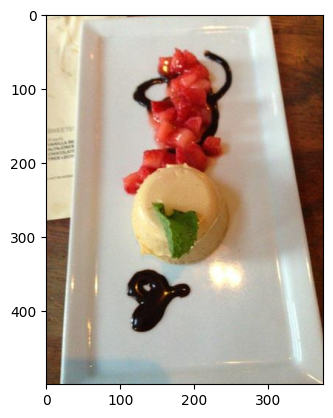

In [50]:
predict_single_resnet34(test_dataset[100][0]) # ใช้ฟังก์ชันที่ชื่อ predict_single มี test_datasetเพื่อทดสอบ โดย predict จาก model ที่ผ่านการ train

Prediction:  tensor([4.2573e-01, 3.5736e-01, 4.1709e-01, 5.3459e-01, 2.4095e-01, 5.5023e-01,
        5.7812e-01, 1.9980e-01, 7.4282e-01, 9.6631e-11], device='cuda:0',
       grad_fn=<SelectBackward0>)
Labels: outdoor_seating(3) has_alcohol(5) has_table_service(6) good_for_kids(8)


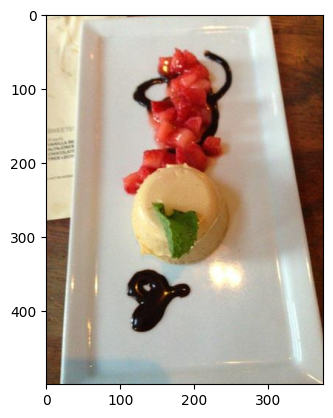

In [51]:
predict_single_resnet50(test_dataset[100][0])

Prediction:  tensor([2.0998e-01, 6.0533e-01, 6.6755e-01, 5.0611e-01, 4.4978e-01, 7.4304e-01,
        7.9737e-01, 3.9338e-01, 4.9474e-01, 9.1192e-11], device='cuda:0',
       grad_fn=<SelectBackward0>)
Labels: good_for_dinner(1) takes_reservations(2) outdoor_seating(3) has_alcohol(5) has_table_service(6)


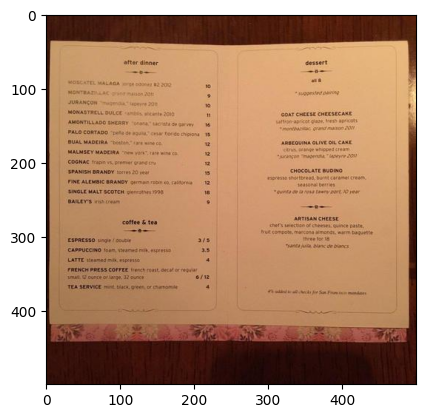

In [52]:
predict_single_resnet34(test_dataset[77][0]) # ใช้ฟังก์ชันที่ชื่อ predict_single มี test_datasetเพื่อทดสอบ โดย predict จาก model ที่ผ่านการ train

Prediction:  tensor([3.7826e-01, 4.0947e-01, 4.7569e-01, 5.2464e-01, 2.7902e-01, 6.0368e-01,
        6.3118e-01, 2.3246e-01, 6.9990e-01, 9.4828e-11], device='cuda:0',
       grad_fn=<SelectBackward0>)
Labels: outdoor_seating(3) has_alcohol(5) has_table_service(6) good_for_kids(8)


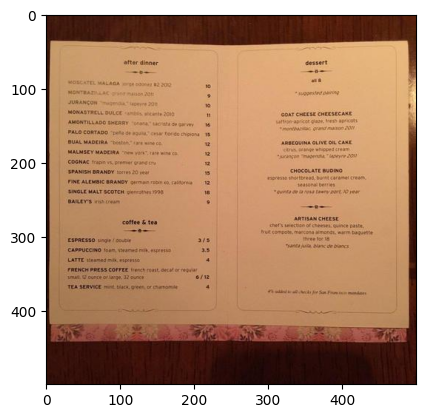

In [53]:
predict_single_resnet50(test_dataset[77][0]) # ใช้ฟังก์ชันที่ชื่อ predict_single มี test_datasetเพื่อทดสอบ โดย predict จาก model ที่ผ่านการ train

<div class="alert alert-block alert-info">  
<b>📎</b> ทำนายผลลัพธ์จากโมเดล deep learning เพื่อรับข้อมูลนำเข้าแบบชุดจากชุดข้อมูลทดสอบ และนำไปทำนายผลลัพธ์จากโมเดลที่กำหนด 
</div>

In [54]:
def predict_dl(dl, model):                                            # กำหนดฟังก์ชันที่ชื่อ predict_dl ซึ่งรับ dataloader (dl) และโมเดล deep learning (model) เป็นพารามิเตอร์
    torch.cuda.empty_cache()                                          # ล้างแคชหน่วยความจำ GPU
    model.eval()                                                      # กำหนดโมเดลให้เข้าสู่โหมดการประเมินใน PyTorch
    batch_probs = []

    for xb, _ in tqdm(dl):                                            # batch ใน dataloader (dl). นำข้อมูลนำเข้า (xb) และ target ที่เกี่ยวข้อง (ทำการละเว้น target ด้วย _)
        # Add an extra dimension to the input tensor
        xb = xb.unsqueeze(0)                                          # เพิ่มมิติเสริมให้กับเทนเซอร์ที่นำเข้ามา
        
        with torch.no_grad():                                         # ล็อก gradient computation ขณะทำนายโมเดลเพื่อประหยัดหน่วยความจำ
            probs = modelres34(xb)                                         # predictผลลัพธ์โดยส่งข้อมูลเข้าโมเดล
        
        batch_probs.append(probs.cpu().detach())                      # เพิ่มผลpredictเข้าไปในlist

    batch_probs = torch.cat(batch_probs)                              # Concatenates the list of predictions into a single tensor
    return [decode_target(x) for x in batch_probs]

<div class="alert alert-success">  
<b>📍</b> ใช้ Model Predict ค่าแล้วจากนั้นเก็บในตัวแปรที่เตรียมไว้
</div>

In [55]:
test_preds_resnet50 = predict_dl(test_dl, modelres50)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [56]:
test_preds_resnet34 = predict_dl(test_dl, modelres34)                               # predict modelกับข้อมูลทดสอบ และแสดงผลลัพ

  0%|          | 0/10000 [00:00<?, ?it/s]


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000000; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #003300" id="submit">Submission File  </p>

In [57]:
submission_df_resnet34 = pd.read_csv(TEST_CSV)                                # อ่านข้อมูลจากไฟล์ CSV ที่ระบุโดยตัวแปร TEST_CSV ลงใน DataFrame ที่ชื่อว่า submission_df ด้วย pandas
submission_df_resnet50 = pd.read_csv(TEST_CSV)                                
submission_df_resnet34['labels'] = test_preds_resnet34                        # เพิ่มคอลัมน์ใหม่ที่ชื่อ 'labels' ใน DataFrame
submission_df_resnet50['labels'] = test_preds_resnet50                               
submission_df_resnet34 = submission_df_resnet34.drop('photo_id', axis=1)      # Drop คอลัมน์ photo_id จากนั้นเก็บค่าใน submission_df 
submission_df_resnet50 = submission_df_resnet50.drop('photo_id', axis=1)

In [58]:
submission_df_resnet34.sample(n=15)                                                    # แสดงตัวอย่างสุ่มของ 15 แถวจาก DataFrame submission_df

,business_id,labels
7638,rco2l,1 2 3 5 6
2067,7cfg6,1 2 3 5 6
1589,5pep8,1 2 3 5 6
218,0q3on,1 2 3 5 6
7291,q66i1,1 2 3 5 6
2770,9w11r,1 2 3 5 6
3430,c6mqe,1 2 3 5 6
2066,7c9lj,1 2 3 5 6
8179,ta1qi,1 2 3 5 6
4724,gyg2u,1 2 3 5 6


In [59]:
submission_df_resnet50.sample(n=15)                                                    # แสดงตัวอย่างสุ่มของ 15 แถวจาก DataFrame submission_df

,business_id,labels
9851,zgnck,1 2 3 5 6
7151,pngy1,1 2 3 5 6
4634,glzbe,1 2 3 5 6
8788,vlrhj,1 2 3 5 6
1934,6yg21,1 2 3 5 6
9745,z2z5u,1 2 3 5 6
8459,udiw2,1 2 3 5 6
3075,avely,1 2 3 5 6
5404,jepau,1 2 3 5 6
6562,nju8j,1 2 3 5 6


In [60]:
sub34_fname = 'resnet34_submission.csv'                               # กำหนดตัวแปร
sub50_fname = 'resnet50_submission.csv'
submission_df_resnet34.to_csv(sub34_fname, index=False)                    #ใช้ในการบันทึก DataFrame ลงในไฟล์ CSV
submission_df_resnet50.to_csv(sub50_fname, index=False)                    #ใช้ในการบันทึก DataFrame ลงในไฟล์ CSV

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#000000; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #003300" id="ref">Reference</p>
🔑 Enerrio. (2018, July 29). Data exploration yelp classification. Kaggle. 

https://www.kaggle.com/code/enerrio/data-exploration-yelp-classification#Data-Exploration-for-Yelp-Image-Classification-Challenge 

🔑 Millerintllc. (2016, April 11). Imagine an Image1. Kaggle. 

https://www.kaggle.com/code/millerintllc/imagine-an-image1 

🔑 muni04. (2020, July 2). Advanced transfer learning starter notebook. Kaggle.

https://www.kaggle.com/code/muni04/advanced-transfer-learning-starter-notebook